In [70]:
#download the packages to use
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import lightgbm as lgb
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, train_test_split

In [71]:
#load the trainings and test data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [72]:
train.shape

(6895, 70)

In [73]:
# Identify features with missing values
features_with_missing_values = train.columns[train.isnull().any()].tolist()

# Display the count of missing values for each feature
missing_values_count = train[features_with_missing_values].isnull().sum()

# Print the results
print("Features with missing values:")
print(features_with_missing_values)

print("\nCount of missing values for each feature:")
print(missing_values_count)

Features with missing values:
['value_eur', 'club_loaned_from', 'club_joined', 'nation_jersey_number', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'goalkeeping_speed']

Count of missing values for each feature:
value_eur                  2
club_loaned_from        6544
club_joined              351
nation_jersey_number    6482
release_clause_eur       353
player_tags             6124
player_traits           2589
pace                     631
shooting                 631
passing                  631
dribbling                631
defending                631
physic                   631
goalkeeping_speed       6264
dtype: int64


In [74]:
test.shape

(767, 69)

In [75]:
# Identify features with missing values
features_with_missing_values = test.columns[test.isnull().any()].tolist()

# Display the count of missing values for each feature
missing_values_count = test[features_with_missing_values].isnull().sum()

# Print the results
print("Features with missing values:")
print(features_with_missing_values)

print("\nCount of missing values for each feature:")
print(missing_values_count)

Features with missing values:
['value_eur', 'club_loaned_from', 'club_joined', 'nation_jersey_number', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'goalkeeping_speed']

Count of missing values for each feature:
value_eur                 3
club_loaned_from        722
club_joined              45
nation_jersey_number    716
release_clause_eur       48
player_tags             682
player_traits           285
pace                     70
shooting                 70
passing                  70
dribbling                70
defending                70
physic                   70
goalkeeping_speed       697
dtype: int64


In [76]:
#create a new column called is_train to identify after which data belongs to test and train data
test['is_train']=0
train['is_train']=1


In [77]:
# concat train data with test data to have more observations, clean it all together and improve accuracy
all_data = pd.concat([train,test]).reset_index()

In [78]:
pd.set_option('display.max_columns', None)

# 1.Data Preprocessing and Quality Assurance: 

In [79]:
all_data.head()

,index,id,short_name,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,club_name,league_name,league_level,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_name,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,position,is_train
0,0,216302,E. García,71,71,1400000.0,10000,1989-12-28,176,73,Club Atlético de San Luis,Mexican Liga MX,1,29,NaN,2021-07-12,2026,Mexico,NaN,Right,5,3,1,Medium/High,Normal (170-185),No,2400000.0,NaN,Early Crosser,70.0,52.0,60.0,70.0,67.0,66.0,64,40,56,65,41,68,64,58,58,68,71,70,87,61,86,67,77,86,58,66,56,79,53,48,58,66,65,66,65,14,11,12,12,12,NaN,LB,1
1,1,237867,D. Cancola,65,71,1000000.0,2000,1996-10-23,183,73,Ross County FC,Scottish Premiership,1,4,NaN,2021-07-23,2022,Austria,NaN,Right,3,2,1,Medium/Medium,Lean (170-185),No,2000000.0,NaN,NaN,65.0,38.0,58.0,60.0,63.0,67.0,50,31,59,64,31,57,36,41,64,65,64,65,57,62,67,49,62,71,66,42,66,66,48,62,46,59,65,61,58,10,13,7,6,11,NaN,LDM,1
2,2,253472,E. Kahl,65,77,1600000.0,2000,2001-09-27,178,69,Aarhus GF,Danish Superliga,1,19,NaN,2021-07-24,2026,Sweden,NaN,Left,3,3,1,High/Medium,Normal (170-185),No,2300000.0,NaN,Speed Dribbler (AI),79.0,35.0,58.0,66.0,59.0,64.0,59,30,53,60,37,65,56,35,55,64,82,77,71,62,75,50,65,67,61,28,69,62,58,60,31,65,60,58,59,10,10,8,10,11,NaN,LWB,1
3,3,223994,S. Mugoša,72,72,2300000.0,5000,1992-02-26,188,81,Incheon United FC,Korean K League 1,1,9,NaN,2018-02-08,2023,Montenegro,NaN,Right,3,3,1,High/Medium,Lean (185+),No,2900000.0,NaN,Finesse Shot,64.0,74.0,51.0,68.0,24.0,76.0,32,78,75,59,70,65,48,53,45,74,61,66,64,67,53,71,71,75,87,69,52,18,76,60,75,75,16,22,19,16,15,13,8,9,NaN,LS,1
4,4,251635,A. Țigănașu,65,65,525000.0,3000,1990-06-12,179,74,FC Botoşani,Romanian Liga I,1,30,NaN,2019-07-01,2022,Romania,NaN,Left,2,2,1,Medium/High,Normal (170-185),No,709000.0,NaN,Solid Player,74.0,53.0,59.0,53.0,61.0,69.0,64,38,49,63,46,43,53,58,55,56,71,76,70,60,71,72,80,78,70,67,53,63,60,52,52,58,64,61,58,12,5,11,12,15,NaN,LB,1


In [80]:
all_data.shape

(7662, 72)

In [81]:
all_data.isna().sum()

index                         0
id                            0
short_name                    0
overall                       0
potential                     0
                           ... 
goalkeeping_positioning       0
goalkeeping_reflexes          0
goalkeeping_speed          6961
position                    767
is_train                      0
Length: 72, dtype: int64

In [82]:
# Identify features with missing values
features_with_missing_values = all_data.columns[all_data.isnull().any()].tolist()

# Display the count of missing values for each feature
missing_values_count = all_data[features_with_missing_values].isnull().sum()

# Print the results
print("Features with missing values:")
print(features_with_missing_values)

print("\nCount of missing values for each feature:")
print(missing_values_count)

Features with missing values:
['value_eur', 'club_loaned_from', 'club_joined', 'nation_jersey_number', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'goalkeeping_speed', 'position']

Count of missing values for each feature:
value_eur                  5
club_loaned_from        7266
club_joined              396
nation_jersey_number    7198
release_clause_eur       401
player_tags             6806
player_traits           2874
pace                     701
shooting                 701
passing                  701
dribbling                701
defending                701
physic                   701
goalkeeping_speed       6961
position                 767
dtype: int64


In [83]:
# Display variables with more than 80% mising values
missing_percentages = all_data.isnull().sum() / len(all_data) * 100
threshold = 80
print(missing_percentages[missing_percentages > threshold])


club_loaned_from        94.831637
nation_jersey_number    93.944140
player_tags             88.827982
goalkeeping_speed       90.850953
dtype: float64


In [84]:
# Drop variables with more than 80% of missing values

all_data = all_data.drop(["club_loaned_from", "nation_jersey_number", "player_tags", "goalkeeping_speed"], axis=1)

In [85]:
# Dropping extra columns which don't add value
columns1 = ['short_name', 'club_name', 'league_name', 'nationality_name', 'real_face']
all_data = all_data.drop(columns1, axis=1)

In [86]:
all_data.describe()

,index,id,overall,potential,value_eur,wage_eur,height_cm,weight_kg,league_level,club_jersey_number,club_contract_valid_until,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,is_train
count,7662.000000,7662.000000,7662.000000,7662.000000,7.657000e+03,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7.261000e+03,6961.000000,6961.000000,6961.000000,6961.000000,6961.000000,6961.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000
mean,3140.280084,223616.285435,68.842600,72.048029,4.331453e+06,12030.253198,181.484338,75.552467,1.361655,16.525320,2022.763508,2.996346,2.451188,1.147481,8.187938e+06,68.568596,54.301250,60.085045,64.577791,55.609395,68.346215,52.883973,48.222527,55.069956,62.348865,44.775516,58.376273,50.381754,45.283738,56.815583,61.784652,65.905116,66.038110,65.287001,65.020752,64.850692,60.519838,67.255416,67.909554,68.229313,49.838684,59.815714,51.504960,53.130645,56.939441,49.895589,61.901592,51.349517,52.304098,49.800052,15.903289,15.672409,15.545680,15.813234,16.011877,0.899896
std,2101.513688,26710.529813,5.951663,6.074939,1.045019e+07,24385.866372,6.860952,7.042419,0.761018,15.487419,1.207030,0.685301,0.780693,0.470143,2.044656e+07,11.708722,14.354508,9.574193,9.348321,15.624753,8.509289,17.850296,19.569581,16.905886,13.281468,17.879807,17.897941,18.364759,17.835926,14.149990,15.398347,14.501858,14.401695,14.472439,7.930761,14.235664,13.076355,12.171742,15.096912,11.786433,19.300841,16.272640,20.123523,19.313219,13.559154,15.668827,10.886174,19.658360,20.918691,20.638862,17.466642,16.767293,16.319634,17.191808,17.877237,0.300159
min,0.000000,41.000000,48.000000,53.000000,2.500000e+04,500.000000,156.000000,53.000000,1.000000,1.000000,2021.000000,1.000000,1.000000,1.000000,3.900000e+04,28.000000,18.000000,25.000000,29.000000,16.000000,31.000000,7.000000,2.000000,5.000000,7.000000,4.000000,4.000000,7.000000,6.000000,9.000000,10.000000,15.000000,15.000000,19.000000,32.000000,19.000000,20.000000,27.000000,14.000000,25.000000,4.000000,11.000000,6.000000,2.000000,10.000000,8.000000,12.000000,4.000000,5.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
25%,1148.250000,207642.250000,65.000000,68.000000,7.250000e+05,2000.000000,177.000000,70.000000,1.000000,6.000000,2022.000000,3.000000,2.000000,1.000000,1.100000e+06,62.000000,43.000000,54.000000,59.000000,43.000000,63.000000,42.000000,33.000000,48.000000,58.000000,31.000000,53.000000,37.000000,32.000000,50.000000,58.000000,58.000000,59.000000,57.000000,60.000000,56.000000,51.000000,60.000000,63.000000,61.000000,35.000000,51.000000,33.000000,42.000000,48.000000,40.000000,56.000000,35.000000,34.000000,31.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000
50%,3063.500000,228152.500000,68.000000,72.000000,1.400000e+06,4000.000000,182.000000,75.000000,1.000000,13.000000,2023.000000,3.000000,2.0

In [87]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 63 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        7662 non-null   int64  
 1   id                           7662 non-null   int64  
 2   overall                      7662 non-null   int64  
 3   potential                    7662 non-null   int64  
 4   value_eur                    7657 non-null   float64
 5   wage_eur                     7662 non-null   int64  
 6   birthday_date                7662 non-null   object 
 7   height_cm                    7662 non-null   int64  
 8   weight_kg                    7662 non-null   int64  
 9   league_level                 7662 non-null   int64  
 10  club_jersey_number           7662 non-null   int64  
 11  club_joined                  7266 non-null   object 
 12  club_contract_valid_until    7662 non-null   int64  
 13  preferred_foot    

In [88]:
# Cleaning player_traits

# Function to convert the string list to a list
def clean_traits(x):
    if isinstance(x, str):
        return x.split(',')
    else:
        return x

# Apply function to column
all_data['player_traits'] = all_data['player_traits'].apply(clean_traits)

# Look at number of unique player traits
traits = [trait for sublist in all_data[~all_data['player_traits'].isna()]['player_traits'] for trait in sublist]

# Count the occurrences of each string
trait_counts = Counter(traits)

# Get the unique strings and their counts
print('The number of unique traits is ' + str(len(trait_counts.keys())))

The number of unique traits is 48


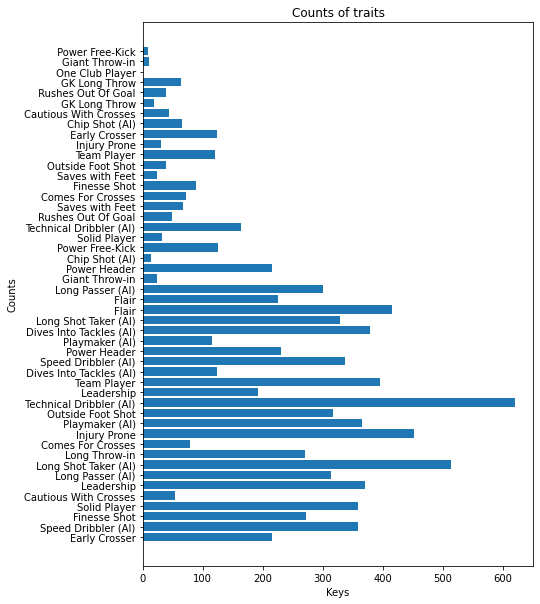

In [89]:
# Plot chart with traits
keys, counts = zip(*trait_counts.items())

fig, ax = plt.subplots(figsize=(7, 10))
ax.barh(keys, counts)
ax.set_xlabel('Keys')
ax.set_ylabel('Counts')
ax.set_title('Counts of traits')
plt.show()

In [90]:
# Feature generation with dates variable

# Convert 'birthdate' to a datetime object
all_data['club_joined'] = pd.to_datetime(all_data['club_joined'])
all_data['birthday_date'] = pd.to_datetime(all_data['birthday_date'])

# Define the reference date (e.g., the current date)
reference_date = datetime.now()

# Calculate the age by subtracting the birthdate from the reference date
all_data['yearinclub'] = (reference_date - all_data['club_joined']).dt.days // 365
all_data['age'] = (reference_date - all_data['birthday_date']).dt.days // 365

all_data['years_until_contract_expires'] =  all_data.club_contract_valid_until - datetime.today().year

# Print the result
print(all_data[['yearinclub', 'age', 'years_until_contract_expires']].head())


   yearinclub  age  years_until_contract_expires
0         2.0   33                             3
1         2.0   27                            -1
2         2.0   22                             3
3         5.0   31                             0
4         4.0   33                            -1


In [91]:
# Cleaning the body type variable
def extract_bodytype(bodytype_string):
    return bodytype_string.split()[0]

# Apply the function to the 'bodytype' column
all_data['body_type'] = all_data['body_type'].apply(extract_bodytype)

print(all_data['body_type'].unique())

['Normal' 'Lean' 'Stocky' 'Unique']


In [92]:
# Work_rate
print(all_data['work_rate'].unique())

['Medium/High' 'Medium/Medium' 'High/Medium' 'High/Low' 'High/High'
 'Medium/Low' 'Low/Medium' 'Low/High' 'Low/Low']


In [93]:
# Creating categorical variables for the work rate
all_data['attacking_wr'] = all_data['work_rate'].apply(lambda x: x.split('/')[0])
all_data['defensive_wr'] = all_data['work_rate'].apply(lambda x: x.split('/')[1])

def wr_converter(wr):
    if wr == 'High':
        return 3
    if wr == 'Medium':
        return 2
    if wr == 'Low':
        return 1
    else:
        raise CustomError("Invalid workrate")
    
all_data['attacking_wr'] = all_data['attacking_wr'].apply(wr_converter)
all_data['defensive_wr'] = all_data['defensive_wr'].apply(wr_converter)

In [94]:
encoder = LabelEncoder()
all_data['body_type_encoded'] = encoder.fit_transform(all_data['body_type'])
all_data['preferred_foot_encoded'] = encoder.fit_transform(all_data['preferred_foot'])

In [95]:
# Identify features with missing values
features_with_missing_values = all_data.columns[all_data.isnull().any()].tolist()

# Display the count of missing values for each feature
missing_values_count = all_data[features_with_missing_values].isnull().sum()

# Print the results
print("Features with missing values:")
print(features_with_missing_values)

print("\nCount of missing values for each feature:")
print(missing_values_count)

Features with missing values:
['value_eur', 'club_joined', 'release_clause_eur', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'position', 'yearinclub']

Count of missing values for each feature:
value_eur                5
club_joined            396
release_clause_eur     401
player_traits         2874
pace                   701
shooting               701
passing                701
dribbling              701
defending              701
physic                 701
position               767
yearinclub             396
dtype: int64


In [96]:
#we use the KNNimputer to imputate the missing values in the numeric variables
def impute(data,columns):
    # Create KNNImputer object with k=8
    imputer = KNNImputer(n_neighbors=80)
    # Perform KNN imputation
    data[columns] = imputer.fit_transform(data[columns])
    return data[columns]

imputer_columns=['value_eur', 'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'yearinclub']

impute(all_data,imputer_columns)
all_data.isna().sum()

index                           0
id                              0
overall                         0
potential                       0
value_eur                       0
                               ..
years_until_contract_expires    0
attacking_wr                    0
defensive_wr                    0
body_type_encoded               0
preferred_foot_encoded          0
Length: 70, dtype: int64

In [97]:
#international reputation
print(all_data['international_reputation'].unique())

[1 2 3 4 5]


In [98]:
# Normalizing the numerical data (we do not normalize the jersey number)
def normalize_data(data):
    min_value = min(data)
    max_value = max(data)
    normalized_data = []

    for value in data:
        normalized_value = (value - min_value) / (max_value - min_value)
        normalized_data.append(normalized_value)

    return normalized_data

all_data['overall'] = normalize_data(all_data['overall'])
all_data['potential'] = normalize_data(all_data['potential'])
all_data['value_eur'] = normalize_data(all_data['value_eur'])
all_data['wage_eur'] = normalize_data(all_data['wage_eur'])
all_data['height_cm'] = normalize_data(all_data['height_cm'])
all_data['weight_kg'] = normalize_data(all_data['weight_kg'])
all_data['league_level'] = normalize_data(all_data['league_level'])
all_data['weak_foot'] = normalize_data(all_data['weak_foot'])
all_data['skill_moves'] = normalize_data(all_data['skill_moves'])
all_data['international_reputation'] = normalize_data(all_data['international_reputation'])
all_data['release_clause_eur'] = normalize_data(all_data['release_clause_eur'])
all_data['pace'] = normalize_data(all_data['pace'])
all_data['shooting'] = normalize_data(all_data['shooting'])
all_data['passing'] = normalize_data(all_data['passing'])
all_data['dribbling'] = normalize_data(all_data['dribbling'])
all_data['defending'] = normalize_data(all_data['defending'])
all_data['physic'] = normalize_data(all_data['physic'])
all_data['attacking_crossing'] = normalize_data(all_data['attacking_crossing'])
all_data['attacking_heading_accuracy'] = normalize_data(all_data['attacking_heading_accuracy'])
all_data['preferred_foot_encoded'] = normalize_data(all_data['preferred_foot_encoded'])
all_data['mentality_positioning'] = normalize_data(all_data['mentality_positioning'])
all_data['attacking_finishing'] = normalize_data(all_data['attacking_finishing'])
all_data['defending_sliding_tackle'] = normalize_data(all_data['defending_sliding_tackle'])
all_data['goalkeeping_reflexes'] = normalize_data(all_data['goalkeeping_reflexes'])
all_data['mentality_interceptions'] = normalize_data(all_data['mentality_interceptions'])
all_data['power_strength'] = normalize_data(all_data['power_strength'])

display(all_data)

,index,id,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,league_level,club_jersey_number,club_joined,club_contract_valid_until,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,position,is_train,yearinclub,age,years_until_contract_expires,attacking_wr,defensive_wr,body_type_encoded,preferred_foot_encoded
0,0,216302,0.511111,0.428571,0.007089,0.027182,1989-12-28,0.425532,0.40,0.00,29,2021-07-12,2026,Right,1.00,0.50,0.0,Medium/High,Normal,0.006322,[Early Crosser],0.608696,0.447368,0.514706,0.621212,0.680000,0.593220,0.655172,0.408602,0.579545,65,41,68,64,58,58,68,71,70,87,61,86,67,77,86,0.471429,66,56,0.858824,0.542553,48,58,66,65,66,0.686047,14,11,12,12,0.113636,LB,1,2.0,33,3,2,3,1,1.0
1,1,237867,0.377778,0.428571,0.005026,0.004292,1996-10-23,0.574468,0.40,0.00,4,2021-07-23,2022,Right,0.50,0.25,0.0,Medium/Medium,Lean,0.005251,NaN,0.536232,0.263158,0.485294,0.469697,0.626667,0.610169,0.494253,0.311828,0.613636,64,31,57,36,41,64,65,64,65,57,62,67,49,62,71,0.585714,42,66,0.705882,0.489362,62,46,59,65,61,0.604651,10,13,7,6,0.102273,LDM,1,2.0,27,-1,2,2,0,1.0
2,2,253472,0.377778,0.571429,0.008120,0.004292,2001-09-27,0.468085,0.32,0.00,19,2021-07-24,2026,Left,0.50,0.50,0.0,High/Medium,Normal,0.006054,[Speed Dribbler (AI)],0.739130,0.223684,0.485294,0.560606,0.573333,0.559322,0.597701,0.301075,0.545455,60,37,65,56,35,55,64,82,77,71,62,75,50,65,67,0.514286,28,69,0.658824,0.595745,60,31,65,60,58,0.616279,10,10,8,10,0.102273,LWB,1,2.0,22,3,3,2,1,0.0
3,3,223994,0.533333,0.452381,0.011728,0.012876,1992-02-26,0.680851,0.56,0.00,9,2018-02-08,2023,Right,0.50,0.50,0.0,High/Medium,Lean,0.007661,[Finesse Shot],0.521739,0.736842,0.382353,0.590909,0.106667,0.762712,0.287356,0.817204,0.795455,59,70,65,48,53,45,74,61,66,64,67,53,71,71,75,0.885714,69,52,0.141176,0.787234,60,75,75,16,22,0.151163,16,15,13,8,0.079545,LS,1,5.0,31,0,3,2,0,1.0
4,4,251635,0.377778,0.285714,0.002578,0.007153,1990-06-12,0.489362,0.42,0.00,30,2019-07-01,2022,Left,0.25,0.25,0.0,Medium/High,Normal,0.001794,[Solid Player],0.666667,0.460526,0.500000,0.363636,0.600000,0.644068,0.655172,0.387097,0.500000,63,46,43,53,58,55,56,71,76,70,60,71,72,80,78,0.642857,67,53,0.670588,0.617021,52,52,58,64,61,0.604651,12,5,11,12,0.147727,LB,1,4.0,33,-1,2,3,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,762,205601,0.533333,0.452381,0.011728,0.047210,1992-01-10,0.191489,0.24,0.00,3,2021-07-17,2025,Left,0.50,0.50,0.0,Medium/Low,Lean,0.010071,[Speed Dribbler (AI)],0.782609,0.631579,0.632353,0.696970,0.240000,0.152542,0.701149,0.655914,0.477273,70,58,76,70,58,61,72,86,78,86,65,87,72,65,50,0.085714,66,43,0.341176,0.755319,71,70,64,30,33,0.302326,13,12,12,10,0.079545,NaN,0,2.0,31,2,2,1,0,0.0
7658,763,223752,0.444444,0.500000,0.008635,0.004292,1996-04-17,0.510638,0.34,0.00,2,2019-01-01,2022,Right,0.25,0.25,0.0,Low/High,Stocky,0.006857,NaN,0.579710,0.342105,0.367647,0.303030,0.653333,0.847458,0.517241,0.397849,0.750000,59,46,34,35,29,53,60,66,69,65,63,57,52,91,78,0.8

In [99]:
#we deconcatenate again the test data and train data from the all_data
train_data = all_data.loc[all_data.is_train == 1]
test_data = all_data.loc[all_data.is_train == 0]

In [100]:
#We check that it deconcatenated properly and we are working with the correct dataframes
train_data.shape,test_data.shape

((6895, 70), (767, 70))

In [101]:
all_columns = all_data.columns.tolist()
print("All column names:", all_columns)

All column names: ['index', 'id', 'overall', 'potential', 'value_eur', 'wage_eur', 'birthday_date', 'height_cm', 'weight_kg', 'league_level', 'club_jersey_number', 'club_joined', 'club_contract_valid_until', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'release_clause_eur', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking

In [102]:
# columns_for_prediction = ['overall', 'potential', 'value_eur', 'wage_eur', 'height_cm', 'weight_kg', 'league_level', 'club_jersey_number', 'weak_foot', 'skill_moves', 'international_reputation', 'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'yearinclub', 'age', 'years_until_contract_expires', 'body_type_encoded', 'attacking_wr', 'defensive_wr', 'preferred_foot_encoded']
columns_for_prediction = ['overall', 'potential', 'value_eur', 'wage_eur','height_cm', 'weight_kg', 'club_jersey_number', 'weak_foot', 'skill_moves', 'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'age', 'body_type_encoded', 'attacking_wr', 'defensive_wr', 'preferred_foot_encoded']
X = train_data[columns_for_prediction] # Features
y = train_data['position']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [34]:
# Train a RandomForestClassifier to get feature importances
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [55]:
# Print the sorted feature importances
print("Feature importances:")
print(feature_importance_df)

# Select the top k features based on importance
k = 20  # You can choose your desired number of top features
selected_features = feature_importance_df.head(k)['Feature'].tolist()

# Print the selected features
print(f"\nTop {k} selected features:")
print(selected_features)

Feature importances:
                        Feature  Importance
33        mentality_positioning    0.036522
13   attacking_heading_accuracy    0.034411
11           attacking_crossing    0.031731
49       preferred_foot_encoded    0.031440
41         goalkeeping_handling    0.028337
39     defending_sliding_tackle    0.027956
32      mentality_interceptions    0.025760
9                     defending    0.025027
29               power_strength    0.024661
12          attacking_finishing    0.024299
44         goalkeeping_reflexes    0.024207
40           goalkeeping_diving    0.024127
43      goalkeeping_positioning    0.023040
16              skill_dribbling    0.022833
37  defending_marking_awareness    0.022806
42          goalkeeping_kicking    0.021814
22        movement_sprint_speed    0.021722
34             mentality_vision    0.021660
19           skill_long_passing    0.021403
15            attacking_volleys    0.021148
6                      shooting    0.021038
38    defen

In [103]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.45395213923132705


In [104]:
# Train a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
gb_predictions = gb_model.predict(X_test)
# Evaluate the Gradient Boosting model
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)

KeyboardInterrupt: 

In [114]:
#Lightgbm estimator
light_model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
light_model.fit(X_train, y_train)
light_predictions = light_model.predict(X_test)
# Evaluate the Loghtgbm model
light_accuracy = accuracy_score(y_test, light_predictions)
print("Light Accuracy:", light_accuracy)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001927 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4792
[LightGBM] [Info] Number of data points in the train set: 5516, number of used features: 55
[LightGBM] [Info] Start training from score -3.235511
[LightGBM] [Info] Start training from score -3.779126
[LightGBM] [Info] Start training from score -3.787095
[LightGBM] [Info] Start training from score -4.504534
[LightGBM] [Info] Start training from score -2.398802
[LightGBM] [Info] Start training from score -2.685819
[LightGBM] [Info] Start training from score -2.373185
[LightGBM] [Info] Start training from score -2.771864
[LightGBM] [Info] Start training from score -3.604773
[LightGBM] [Info] Start training from score -5.437354
[LightGBM] [Info] Start training from score -2.911626
[LightGBM] [Info] Start training from score -3.485510
[LightGBM] [Info] Start training from score -3.710133
[LightGBM]

In [105]:
#Random Forest and Gradient Boosting,

# Step 3: Create the StratifiedKFold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


import time

# Function to evaluate model and measure time
def evaluate_model_with_time(model, X, y, cv):
    start_time = time.time()
    scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=cv)
    end_time = time.time()
    elapsed_time = end_time - start_time
    return scores.mean(), elapsed_time

# Initialize the models
logistic_regression = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier()
lightgbm = lgb.LGBMClassifier()

# Create a dictionary to store the results and time spent
results_linear = {}
results_rf = {}
times_linear = {}
times_rf = {}
results_light = {}
times_light = {}

# Method 1: No cross-validation
results_linear['No CV'], times_linear['No CV'] = evaluate_model_with_time(logistic_regression, X, y, cv=None)
results_rf['No CV'], times_rf['No CV'] = evaluate_model_with_time(random_forest, X, y, cv=None)
results_light['No CV'], times_light['No CV'] = evaluate_model_with_time(lightgbm, X, y, cv=None)





/home/pere/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/pere/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4794
[LightGBM] [Info] Number of data points in the train set: 5516, number of used features: 55
[LightGBM] [Info] Start training from score -3.268301
[LightGBM] [Info] Start training from score -3.717568
[LightGBM] [Info] Start training from score -3.819618
[LightGBM] [Info] Start training from score -4.521064
[LightGBM] [Info] Start training from score -2.392832
[LightGBM] [Info] Start training from score -2.701905
[LightGBM] [Info] Start training from score -2.390850
[LightGBM] [Info] Start training from score -2.789408
[LightGBM] [Info] Start training from score -3.534004
[LightGBM] [Info] Start training from score -5.357312
[LightGBM] [Info] Start training from score -2.928433
[LightGBM] [Info] Start training from score -3.534004
[LightGBM] [Info] Start training from score -3.725059
[LightGBM]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [106]:
# Method 2: k-fold cross-validation (e.g., k=5)
kf = KFold(n_splits=5)
results_linear['K-fold'], times_linear['K-fold'] = evaluate_model_with_time(logistic_regression, X, y, cv=kf)
results_rf['K-fold'], times_rf['K-fold'] = evaluate_model_with_time(random_forest, X, y, cv=kf)
results_light['K-fold'], times_light['K-fold'] = evaluate_model_with_time(lightgbm, X, y, cv=kf)

/home/pere/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/pere/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4798
[LightGBM] [Info] Number of data points in the train set: 5516, number of used features: 55
[LightGBM] [Info] Start training from score -3.307141
[LightGBM] [Info] Start training from score -3.811387
[LightGBM] [Info] Start training from score -3.811387
[LightGBM] [Info] Start training from score -4.504534
[LightGBM] [Info] Start training from score -2.382960
[LightGBM] [Info] Start training from score -2.696514
[LightGBM] [Info] Start training from score -2.414899
[LightGBM] [Info] Start training from score -2.807266
[LightGBM] [Info] Start training from score -3.503420
[LightGBM] [Info] Start training from score -5.319571
[LightGBM] [Info] Start training from score -2.925049
[LightGBM] [Info] Start training from score -3.540234
[LightGBM] [Info] Start training from score -3.717568
[LightGBM]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [107]:
# Method 3: Stratified k-fold cross-validation (e.g., k=5)
skf = StratifiedKFold(n_splits=5)
results_linear['Stratified'], times_linear['Stratified'] = evaluate_model_with_time(logistic_regression, X, y, cv=skf)
results_rf['Stratified'], times_rf['Stratified'] = evaluate_model_with_time(random_forest, X, y, cv=skf)
results_light['Stratified'], times_light['Stratified'] = evaluate_model_with_time(lightgbm, X, y, cv=skf)

/home/pere/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/pere/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4794
[LightGBM] [Info] Number of data points in the train set: 5516, number of used features: 55
[LightGBM] [Info] Start training from score -3.268301
[LightGBM] [Info] Start training from score -3.717568
[LightGBM] [Info] Start training from score -3.819618
[LightGBM] [Info] Start training from score -4.521064
[LightGBM] [Info] Start training from score -2.392832
[LightGBM] [Info] Start training from score -2.701905
[LightGBM] [Info] Start training from score -2.390850
[LightGBM] [Info] Start training from score -2.789408
[LightGBM] [Info] Start training from score -3.534004
[LightGBM] [Info] Start training from score -5.357312
[LightGBM] [Info] Start training from score -2.928433
[LightGBM] [Info] Start training from score -3.534004
[LightGBM] [Info] Start training from score -3.725059
[LightGBM]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [108]:
# Convert the results and times to DataFrames for easier comparison
results_ln = pd.DataFrame(results_linear, index=['Linear Regression'])
results_rf = pd.DataFrame(results_rf, index=['Random Forest'])
times_ln = pd.DataFrame(times_linear, index=['Linear Regression'])
times_rf = pd.DataFrame(times_rf, index=['Random Forest'])
results_light = pd.DataFrame(results_light, index=['light'])
times_light = pd.DataFrame(times_light, index=['light'])

# Display the accuracy and time results
print("Accuracy Results:")
display(pd.concat([results_ln, results_rf, results_light]))
print("\nTime Spent:")
display(pd.concat([times_ln, times_rf, times_light]))

Accuracy Results:


,No CV,K-fold,Stratified
Linear Regression,0.401113,0.399215,0.401113
Random Forest,0.397015,0.394093,0.394243
light,0.401262,0.405942,0.401262



Time Spent:


,No CV,K-fold,Stratified
Linear Regression,54.429151,51.320397,53.254416
Random Forest,10.162764,10.394552,10.626193
light,18.121616,15.553303,16.393469


In [131]:
#Optimizing Random Forest hyperparameters using Grid Search with cross-validation

from sklearn.model_selection import GridSearchCV


# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state = 42)

# Define the hyperparameters and their ranges for tuning
param_grid = {
    'n_estimators': [50, 100, 300],  # Number of trees
    'max_depth': [5, 10, 15],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split a node
    # Add more hyperparameters and values as needed
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with best hyperparameters on test data
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)
accuracy = best_rf.score(X_test, y_test)
print("Accuracy with best hyperparameters:", accuracy)


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy with best hyperparameters: 0.4452501812907904


In [ ]:
#Optimizing lightGBM hyperparameters using Grid Search with cross-validation


# Initialize the LGBMClassifier
lgbm = lgb.LGBMClassifier(random_state = 42)

# Define the hyperparameters and their ranges for tuning
param_grid = {
    'n_estimators': [50, 100],  # Number of boosting iterations
    'max_depth': [5, 10],  # Maximum depth of tree (-1 means no limit)
    # Add more hyperparameters and values as needed
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with best hyperparameters on test data
best_lgbm = LGBMClassifier(**best_params)
best_lgbm.fit(X_train, y_train)
accuracy = best_lgbm.score(X_test, y_test)
print("Accuracy with best hyperparameters:", accuracy)


In [132]:
# Predictions with Random Forest Classifier
#rf_model = RandomForestClassifier(n_estimators=300, min_samples_split = 2, max_depth = 10, random_state=42)  # THIS is the model that gives the best kaggle score
#rf_model.fit(X, y)

# Predict on the test set
kaggle_predictions_rf = best_rf.predict(test_data[columns_for_prediction])

In [115]:
# Predictions with lightGBM

kaggle_predictions_lgbm = best_lgbm.predict(test_data[columns_for_prediction])

In [133]:
# Produce .csv for kaggle testing
test_predictions = pd.DataFrame({"id": test_data["id"], "position":kaggle_predictions_rf  })
test_predictions.to_csv("/home/pere/CML_DSDM/fifa_predictions/pere_trial.csv", index = False)